In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

In [3]:
from analysis.database import get_config

config = get_config()

df = pd.read_excel(
    f"../data/individual_all_data-{config.version}.xlsx",
    index_col=0,
)
df.head()

,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,resource_uri,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,https://pubmed.ncbi.nlm.nih.gov/22787013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,https://pubmed.ncbi.nlm.nih.gov/21616285,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,https://pubmed.ncbi.nlm.nih.gov/32553227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,https://pubmed.ncbi.nlm.nih.gov/23595086,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,https://pubmed.ncbi.nlm.nih.gov/26114861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def is_gaussian(p_val):
    # interpret results
    alpha = 0.05
    if p_val > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [16]:
# D'Agostino and Pearson's Test
stat_dp, p_val_dp = stats.mstats.normaltest(
    df[
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna()
)

print(f"stat: {stat_dp}, p_val: {p_val_dp}")
is_gaussian(p_val_dp)

stat: 223.1868818483469, p_val: 3.4322932800502944e-49
Sample does not look Gaussian (reject H0)


In [17]:
stat_s, p_val_s = stats.shapiro(df[
                                    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna())
print(f"stat: {stat_s}, p_val: {p_val_s}")
is_gaussian(p_val_s)

stat: 0.7430225235749679, p_val: 1.0739544544025657e-24
Sample does not look Gaussian (reject H0)


In [18]:
# Anderson-Darling Test (better K-S test?)
result = stats.anderson(
    df[
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna(),
    dist='norm'
)

print('Statistic: %.3f' % result.statistic)
p = 0
# interpret results
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (
            slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (
            slevel, cvalues))

Statistic: 30.783
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


In [5]:
import statsmodels.api as sm

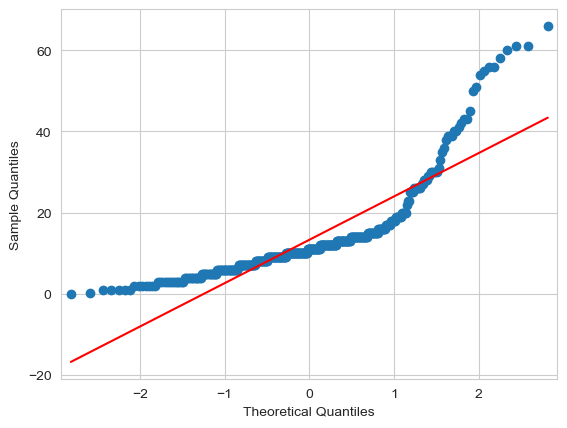

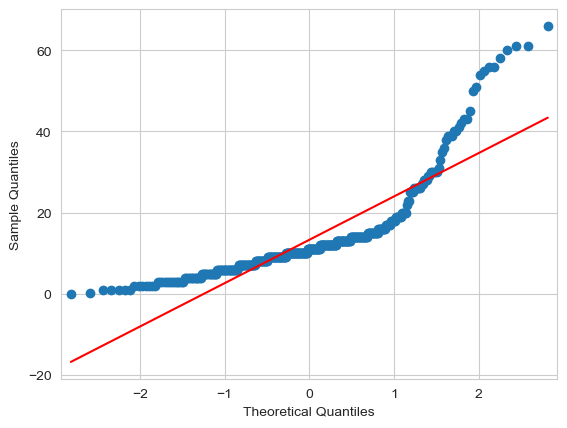

In [7]:
sm.qqplot(
    df[
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna(),
    line='s'
)

NormaltestResult(statistic=1.7763517975162066, pvalue=0.41140551403328207)


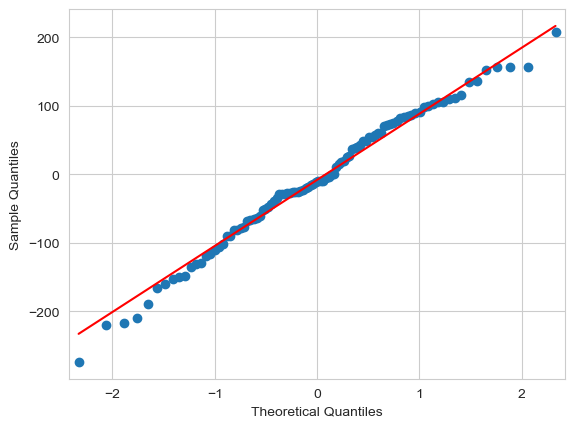

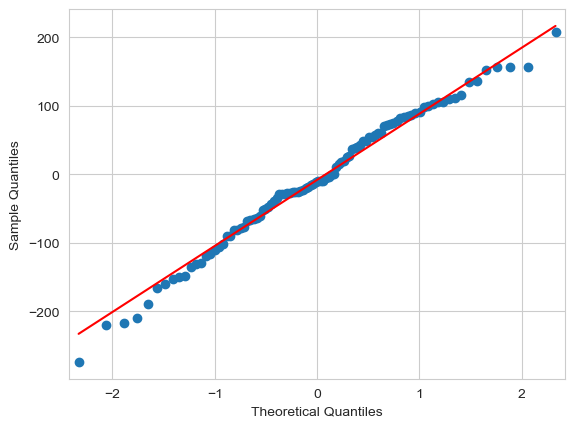

In [39]:
normal_dist = np.random.normal(0, 100, 100)

print(stats.mstats.normaltest(normal_dist))
sm.qqplot(
    normal_dist,
    line='s'
)

<Axes: ylabel='Count'>

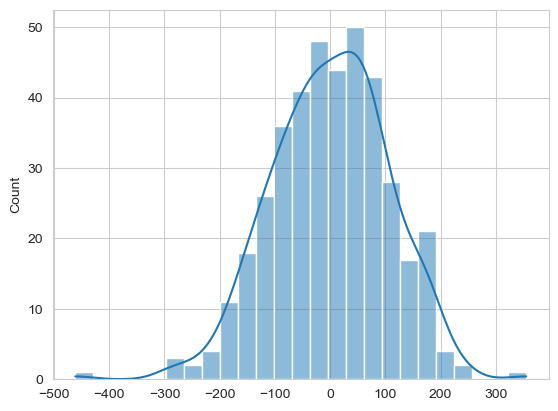

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(
    normal_dist,
    kde=True,
    bins=25
)

<Axes: xlabel='age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1', ylabel='Count'>

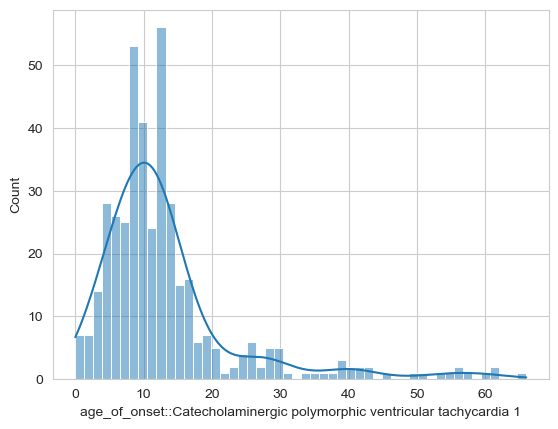

In [25]:
sns.histplot(
    df[
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna(),
    kde=True,
    bins=50
)

<Axes: xlabel='age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1', ylabel='Count'>

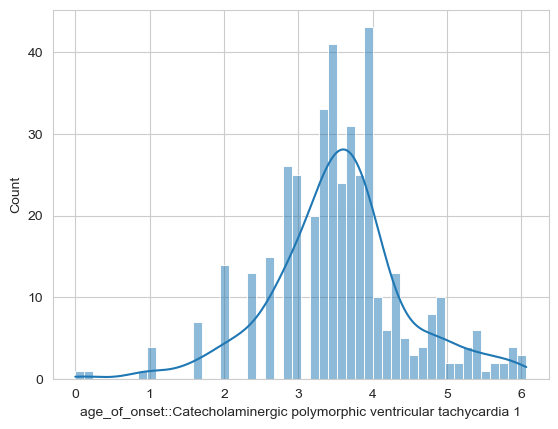

In [46]:
log_age = np.log2(df[
                      "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].dropna() + 1)

sns.histplot(
    log_age,
    kde=True,
    bins=50
)

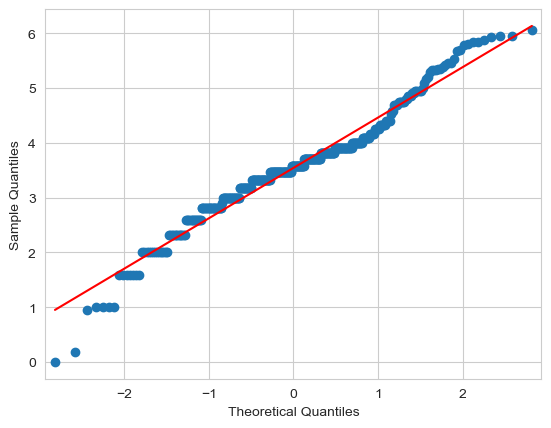

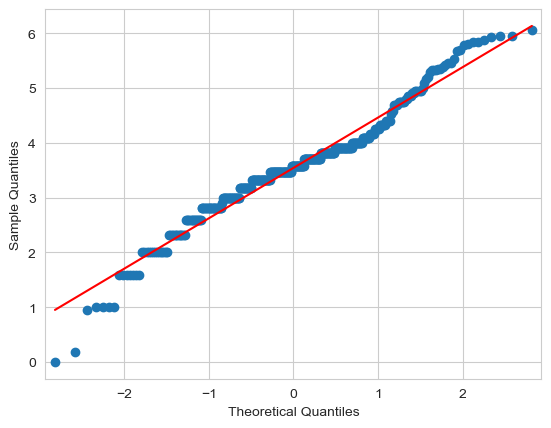

In [47]:
sm.qqplot(
    log_age,
    line='s'
)

In [48]:
# D'Agostino and Pearson's Test
stat_dp, p_val_dp = stats.mstats.normaltest(
    log_age
)

print(f"stat: {stat_dp}, p_val: {p_val_dp}")
is_gaussian(p_val_dp)

stat: 14.912542742978907, p_val: 0.0005778065860577188
Sample does not look Gaussian (reject H0)


In [49]:
stat_s, p_val_s = stats.shapiro(log_age)
print(f"stat: {stat_s}, p_val: {p_val_s}")
is_gaussian(p_val_s)

stat: 0.9680139751318011, p_val: 8.518663174598413e-08
Sample does not look Gaussian (reject H0)


In [50]:
result = stats.anderson(
    log_age,
    dist='norm'
)

print('Statistic: %.3f' % result.statistic)
p = 0
# interpret results
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (
            slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (
            slevel, cvalues))

Statistic: 4.781
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


<Axes: ylabel='Count'>

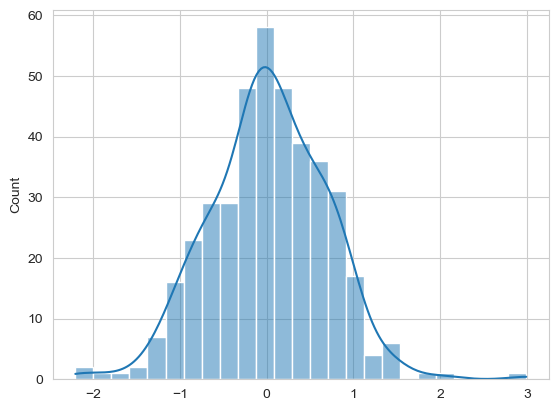

In [42]:
# log normal distribution
log_normal_dist = np.log2(np.random.lognormal(0, 0.5, 400))

sns.histplot(
    log_normal_dist,
    kde=True,
    bins=25
)